In [1]:
import pandas as pd

train_data = pd.read_csv(
    '../CSV/cropped_ROI/5_Label/HSV_GLCM/HSV_GLCM[all]1_Training.csv')
train_data

,label,H,S,V,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135
0,1,69.118242,151.844330,137.142070,9.568106,10.013025,9.471660,9.907702,0.936907,0.932079,0.937981,0.932392,0.228672,0.222006,0.227056,0.222521
1,1,69.338955,150.717190,104.891447,10.461622,10.549691,10.243772,10.837260,0.944381,0.945460,0.952609,0.943683,0.172683,0.162212,0.159683,0.159529
2,1,69.117886,151.844548,137.142069,9.567820,10.013185,9.471982,9.908170,0.936906,0.932077,0.937979,0.932392,0.228764,0.221979,0.227011,0.222454
3,1,69.333632,150.738621,104.894152,10.461313,10.549996,10.243664,10.836857,0.944382,0.945460,0.952604,0.943682,0.172706,0.162083,0.159662,0.159603
4,1,70.313155,159.691307,120.479462,9.700532,9.926974,9.210910,9.628048,0.951344,0.947297,0.953395,0.950587,0.202360,0.202091,0.217130,0.208117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,61.069514,125.270648,149.419752,8.923872,9.131115,8.757145,8.956649,0.956628,0.953491,0.957244,0.954885,0.245962,0.239894,0.248591,0.245312
196,5,61.069294,125.267972,149.417254,8.923951,9.131396,8.757176,8.956726,0.956628,0.953491,0.957244,0.954883,0.245879,0.239833,0.248589,0.245308
197,5,63.242460,137.004822,140.200406,11.560996,11.645497,11.309963,11.503888,0.921104,0.919441,0.924054,0.920500,0.178843,0.175871,0.183005,0.181057
198,5,63.244295,137.012731,140.201640,11.560494,11.645369,11.309862,11.503670,0.921102,0.919440,0.924054,0.920498,0.178917,0.175831,0.183025,0.181045


In [2]:
test_data = pd.read_csv(
    '../CSV/cropped_ROI/5_Label/HSV_GLCM/HSV_GLCM[all]1_Testing.csv')
test_data

,label,H,S,V,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135
0,1,66.123330,169.095792,118.178723,9.553667,10.021898,9.174330,9.694710,0.946938,0.942613,0.950674,0.944688,0.182842,0.175005,0.185662,0.181064
1,1,75.603981,154.566825,123.773088,8.436876,8.413170,8.313592,8.643225,0.962905,0.961989,0.963724,0.961739,0.242269,0.248991,0.253580,0.235256
2,1,66.138247,146.713510,125.218715,8.681594,9.227419,8.536038,8.832467,0.952225,0.947402,0.952485,0.949281,0.228225,0.222834,0.235828,0.233650
3,1,66.143561,161.728684,106.699621,8.174668,8.569956,7.928643,8.275210,0.963721,0.958808,0.963171,0.960992,0.212322,0.207027,0.219586,0.214374
4,2,67.833771,136.813672,122.351752,13.872264,13.905163,14.066154,14.979892,0.891260,0.891032,0.889238,0.875679,0.118680,0.118668,0.115344,0.106699
5,2,60.082315,170.977965,146.443013,10.020028,10.255410,10.164806,10.803002,0.895660,0.891515,0.894462,0.882854,0.176809,0.173278,0.169967,0.162489
6,2,63.537974,141.094607,116.589305,11.880808,12.112189,11.490472,12.496261,0.927647,0.922976,0.931660,0.922069,0.143499,0.142975,0.143535,0.130808
7,2,57.268947,158.553182,156.188983,12.122612,12.106035,12.155070,13.356576,0.894817,0.894578,0.895009,0.877229,0.185447,0.180800,0.182725,0.167621
8,3,69.981349,142.061376,149.233507,6.682127,7.319608,7.327989,7.465772,0.960147,0.950635,0.950298,0.948817,0.283491,0.274078,0.276798,0.267769
9,3,69.665275,158.249980,102.894030,7.097314,7.730951,7.643792,7.597066,0.967154,0.962877,0.965430,0.964887,0.238388,0.222701,0.222084,0.221449


In [3]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [5]:
X_test = test_data.drop('label', axis=1)
y_true = test_data['label']

In [6]:
y_pred = model.predict(X_test)
y_pred

array([2, 3, 1, 1, 5, 2, 2, 5, 3, 3, 3, 3, 4, 4, 4, 1, 5, 5, 5, 1],
      dtype=int64)

In [7]:
X_test['label'] = y_pred
X_test

,H,S,V,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,label
0,66.123330,169.095792,118.178723,9.553667,10.021898,9.174330,9.694710,0.946938,0.942613,0.950674,0.944688,0.182842,0.175005,0.185662,0.181064,2
1,75.603981,154.566825,123.773088,8.436876,8.413170,8.313592,8.643225,0.962905,0.961989,0.963724,0.961739,0.242269,0.248991,0.253580,0.235256,3
2,66.138247,146.713510,125.218715,8.681594,9.227419,8.536038,8.832467,0.952225,0.947402,0.952485,0.949281,0.228225,0.222834,0.235828,0.233650,1
3,66.143561,161.728684,106.699621,8.174668,8.569956,7.928643,8.275210,0.963721,0.958808,0.963171,0.960992,0.212322,0.207027,0.219586,0.214374,1
4,67.833771,136.813672,122.351752,13.872264,13.905163,14.066154,14.979892,0.891260,0.891032,0.889238,0.875679,0.118680,0.118668,0.115344,0.106699,5
5,60.082315,170.977965,146.443013,10.020028,10.255410,10.164806,10.803002,0.895660,0.891515,0.894462,0.882854,0.176809,0.173278,0.169967,0.162489,2
6,63.537974,141.094607,116.589305,11.880808,12.112189,11.490472,12.496261,0.927647,0.922976,0.931660,0.922069,0.143499,0.142975,0.143535,0.130808,2
7,57.268947,158.553182,156.188983,12.122612,12.106035,12.155070,13.356576,0.894817,0.894578,0.895009,0.877229,0.185447,0.180800,0.182725,0.167621,5
8,69.981349,142.061376,149.233507,6.682127,7.319608,7.327989,7.465772,0.960147,0.950635,0.950298,0.948817,0.283491,0.274078,0.276798,0.267769,3
9,69.665275,158.249980,102.894030,7.097314,7.730951,7.643792,7.597066,0.967154,0.962877,0.965430,0.964887,0.238388,0.222701,0.222084,0.221449,3


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.67      0.50      0.57         4
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86         4
           5       0.60      0.75      0.67         4

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



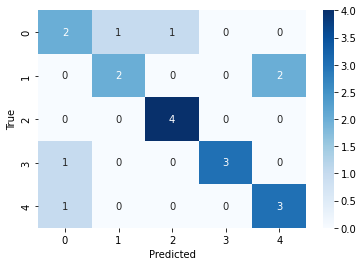

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [11]:
# import joblib

# # simpan model dalam file .pkl
# joblib.dump(model, '../Model/NB_Model_HSV_GLCM[all]3_5Label.pkl')